# R4 - Project on Parkison Disease Using Ensemble Techniques


In [83]:
# Import libraries
import numpy as np
import pandas as pd
from time import time
from sklearn.metrics import f1_score
import seaborn as sns
from matplotlib import pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.metrics import accuracy_score
from sklearn.metrics import make_scorer
from sklearn.metrics import f1_score



### 1. Load the dataset

In [84]:
parkinson_data = pd.read_csv('parkinsons.data', sep=',',header=0)
print("The dataset's shape (#rows, #columns): ",parkinson_data.shape,'\n')
print("The dataset's columns: ",parkinson_data.columns,'\n')
print("Summary of dataset:")
parkinson_data.T

The dataset's shape (#rows, #columns):  (195, 24) 

The dataset's columns:  Index(['name', 'MDVP:Fo(Hz)', 'MDVP:Fhi(Hz)', 'MDVP:Flo(Hz)', 'MDVP:Jitter(%)',
       'MDVP:Jitter(Abs)', 'MDVP:RAP', 'MDVP:PPQ', 'Jitter:DDP',
       'MDVP:Shimmer', 'MDVP:Shimmer(dB)', 'Shimmer:APQ3', 'Shimmer:APQ5',
       'MDVP:APQ', 'Shimmer:DDA', 'NHR', 'HNR', 'status', 'RPDE', 'DFA',
       'spread1', 'spread2', 'D2', 'PPE'],
      dtype='object') 

Summary of dataset:


0               1               2    \
name              phon_R01_S01_1  phon_R01_S01_2  phon_R01_S01_3   
MDVP:Fo(Hz)              119.992           122.4         116.682   
MDVP:Fhi(Hz)             157.302          148.65         131.111   
MDVP:Flo(Hz)              74.997         113.819         111.555   
MDVP:Jitter(%)           0.00784         0.00968          0.0105   
MDVP:Jitter(Abs)           7e-05           8e-05           9e-05   
MDVP:RAP                  0.0037         0.00465         0.00544   
MDVP:PPQ                 0.00554         0.00696         0.00781   
Jitter:DDP               0.01109         0.01394         0.01633   
MDVP:Shimmer             0.04374         0.06134         0.05233   
MDVP:Shimmer(dB)           0.426           0.626           0.482   
Shimmer:APQ3             0.02182         0.03134         0.02757   
Shimmer:APQ5              0.0313         0.04518         0.03858   
MDVP:APQ                 0.02971         0.04368          0.0359   
Shimmer:DDA              0.06545         0.09403          0.0827   
NHR                      0.02211         0.01929         0.01309   
HNR                       21.033          19.085          20.651   
status                         1               1               1   
RPDE                    0.414783        0.458359        0.429895   
DFA                     0.815285        0.819521        0.825288   
spread1                 -4.81303        -4.07519        -4.44318   
spread2                 0.266482         0.33559        0.311173   
D2                       2.30144         2.48685         2.34226   
PPE                     0.284654        0.368674        0.332634   

                             3               4               5    \
name              phon_R01_S01_4  phon_R01_S01_5  phon_R01_S01_6   
MDVP:Fo(Hz)              116.676         116.014         120.552   
MDVP:Fhi(Hz)             137.871         141.781         131.162   
MDVP:Flo(Hz)             111.366         110.655         113.787   
MDVP:Jitter(%)           0.00997         0.01284         0.00968   
MDVP:Jitter(Abs)           9e-05         0.00011           8e-05   
MDVP:RAP                 0.00502         0.00655         0.00463   
MDVP:PPQ                 0.00698         0.00908          0.0075   
Jitter:DDP               0.01505         0.01966         0.01388   
MDVP:Shimmer             0.05492         0.06425         0.04701   
MDVP:Shimmer(dB)           0.517           0.584           0.456   
Shimmer:APQ3             0.02924          0.0349         0.02328   
Shimmer:APQ5             0.04005         0.04825         0.03526   
MDVP:APQ                 0.03772         0.04465         0.03243   
Shimmer:DDA              0.08771          0.1047         0.06985   
NHR                      0.01353         0.01767         0.01222   
HNR                       20.644          19.649          21.378   
status                         1               1               1   
RPDE                    0.434969        0.417356        0.415564   
DFA                     0.819235        0.823484        0.825069   
spread1                  -4.1175        -3.74779        -4.24287   
spread2                 0.334147        0.234513        0.299111   
D2                       2.40555         2.33218         2.18756   
PPE                     0.368975        0.410335        0.357775   

                             6               7               8    \
name              phon_R01_S02_1  phon_R01_S02_2  phon_R01_S02_3   
MDVP:Fo(Hz)              120.267         107.332           95.73   
MDVP:Fhi(Hz)             137.244          113.84         132.068   
MDVP:Flo(Hz)              114.82         104.315          91.754   
MDVP:Jitter(%)           0.00333          0.0029         0.00551   
MDVP:Jitter(Abs)           3e-05           3e-05           6e-05   
MDVP:RAP                 0.00155         0.00144         0.00293   
MDVP:PPQ                 0.00202         0.00182         0.00332   
Jitter:DDP     

Above you can see a summary of the dataset printed out. Just at a glance it looks like columns (transposed to rows above for easy viewing) of the dataset are organized in the right place, but let's take a look at a few aspects of the data to feel more comfortable that it is both complete and what it says it is. First, despite the assurances of UCI, I would like to make sure there aren't any null values in this dataset.

In [85]:
numnulls = parkinson_data.isnull().sum().sum()
print(numnulls)

0


Great! No null variables. I'm just going to make a data set with null variables to make sure that measurement works as intended.

In [26]:
ndf = pd.DataFrame(columns=['1','2','3'])
for i in range(5):
    ndf.loc[i] = None; 
print(ndf)
numnulls2 = ndf.isnull().sum().sum()
print("Number of nulls in dataframe:",numnulls2)

     1    2    3
0  NaN  NaN  NaN
1  NaN  NaN  NaN
2  NaN  NaN  NaN
3  NaN  NaN  NaN
4  NaN  NaN  NaN
Number of nulls in dataframe: 15


### 2. It is always a good practice to eye-ball raw data to get a feel of the data in terms of number of structure of the file, number of attributes, types of attributes and a general idea of likely challenges in the dataset.

In [27]:
parkinson_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 195 entries, 0 to 194
Data columns (total 24 columns):
name                195 non-null object
MDVP:Fo(Hz)         195 non-null float64
MDVP:Fhi(Hz)        195 non-null float64
MDVP:Flo(Hz)        195 non-null float64
MDVP:Jitter(%)      195 non-null float64
MDVP:Jitter(Abs)    195 non-null float64
MDVP:RAP            195 non-null float64
MDVP:PPQ            195 non-null float64
Jitter:DDP          195 non-null float64
MDVP:Shimmer        195 non-null float64
MDVP:Shimmer(dB)    195 non-null float64
Shimmer:APQ3        195 non-null float64
Shimmer:APQ5        195 non-null float64
MDVP:APQ            195 non-null float64
Shimmer:DDA         195 non-null float64
NHR                 195 non-null float64
HNR                 195 non-null float64
status              195 non-null int64
RPDE                195 non-null float64
DFA                 195 non-null float64
spread1             195 non-null float64
spread2             195 non-null floa

In [28]:
parkinson_data.describe().T

count        mean        std         min         25%  \
MDVP:Fo(Hz)       195.0  154.228641  41.390065   88.333000  117.572000   
MDVP:Fhi(Hz)      195.0  197.104918  91.491548  102.145000  134.862500   
MDVP:Flo(Hz)      195.0  116.324631  43.521413   65.476000   84.291000   
MDVP:Jitter(%)    195.0    0.006220   0.004848    0.001680    0.003460   
MDVP:Jitter(Abs)  195.0    0.000044   0.000035    0.000007    0.000020   
MDVP:RAP          195.0    0.003306   0.002968    0.000680    0.001660   
MDVP:PPQ          195.0    0.003446   0.002759    0.000920    0.001860   
Jitter:DDP        195.0    0.009920   0.008903    0.002040    0.004985   
MDVP:Shimmer      195.0    0.029709   0.018857    0.009540    0.016505   
MDVP:Shimmer(dB)  195.0    0.282251   0.194877    0.085000    0.148500   
Shimmer:APQ3      195.0    0.015664   0.010153    0.004550    0.008245   
Shimmer:APQ5      195.0    0.017878   0.012024    0.005700    0.009580   
MDVP:APQ          195.0    0.024081   0.016947    0.007190    0.013080   
Shimmer:DDA       195.0    0.046993   0.030459    0.013640    0.024735   
NHR               195.0    0.024847   0.040418    0.000650    0.005925   
HNR               195.0   21.885974   4.425764    8.441000   19.198000   
status            195.0    0.753846   0.431878    0.000000    1.000000   
RPDE              195.0    0.498536   0.103942    0.256570    0.421306   
DFA               195.0    0.718099   0.055336    0.574282    0.674758   
spread1           195.0   -5.684397   1.090208   -7.964984   -6.450096   
spread2           195.0    0.226510   0.083406    0.006274    0.174351   
D2                195.0    2.381826   0.382799    1.423287    2.099125   
PPE               195.0    0.206552   0.090119    0.044539    0.137451   

                         50%         75%         max  
MDVP:Fo(Hz)       148.790000  182.769000  260.105000  
MDVP:Fhi(Hz)      175.829000  224.205500  592.030000  
MDVP:Flo(Hz)      104.315000  140.018500  239.170000  
MDVP:Jitter(%)      0.004940    0.007365    0.033160  
MDVP:Jitter(Abs)    0.000030    0.000060    0.000260  
MDVP:RAP            0.002500    0.003835    0.021440  
MDVP:PPQ            0.002690    0.003955    0.019580  
Jitter:DDP          0.007490    0.011505    0.064330  
MDVP:Shimmer        0.022970    0.037885    0.119080  
MDVP:Shimmer(dB)    0.221000    0.350000    1.302000  
Shimmer:APQ3        0.012790    0.020265    0.056470  
Shimmer:APQ5        0.013470    0.022380    0.079400  
MDVP:APQ            0.018260    0.029400    0.137780  
Shimmer:DDA         0.038360    0.060795    0.169420  
NHR                 0.011660    0.025640    0.314820  
HNR                22.085000   25.075500   33.047000  
status              1.000000    1.000000    1.000000  
RPDE                0.495954    0.587562    0.685151  
DFA                 0.722254    0.761881    0.825288  
spread1            -5.720868   -5.046192   -2.434031  
spread2             0.218885    0.279234    0.450493  
D2                  2.361532    2.636456    3.671155  
PPE                 0.194052    0.252980    0.527367

### Explanation on features of dataset.

name - ASCII subject name and recording number

MDVP:Fo(Hz) - Average vocal fundamental frequency

MDVP:Fhi(Hz) - Maximum vocal fundamental frequency

MDVP:Flo(Hz) - Minimum vocal fundamental frequency

MDVP:Jitter(%),MDVP:Jitter(Abs),MDVP:RAP,MDVP:PPQ,Jitter:DDP - Several measures of variation in fundamental frequency

MDVP:Shimmer,MDVP:Shimmer(dB),Shimmer:APQ3,Shimmer:APQ5,MDVP:APQ,Shimmer:DDA - Several measures of variation in amplitude

NHR,HNR - Two measures of ratio of noise to tonal components in the voice

status - Health status of the subject (one) - Parkinson’s, (zero) - healthy

RPDE,D2 - Two nonlinear dynamical complexity measures

DFA - Signal fractal scaling exponent

spread1,spread2,PPE - Three nonlinear measures of fundamental frequency variation

## 3.  Using univariate &amp; bivariate analysis to check the individual attributes for their basic statistic such as central values, spread, tails etc. What are your observations? 

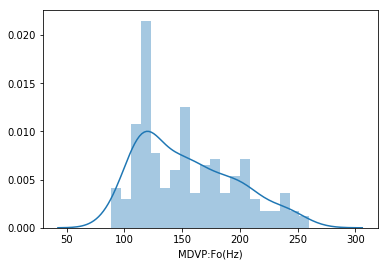

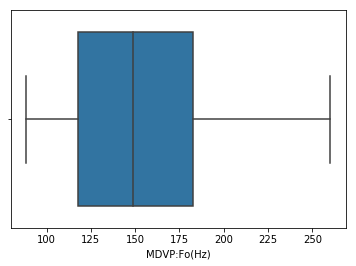

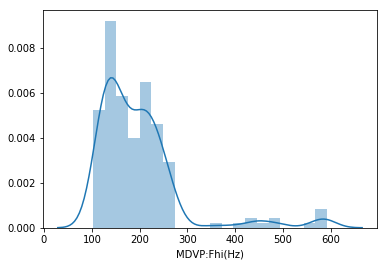

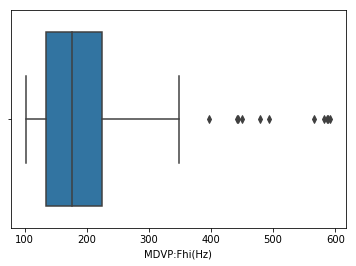

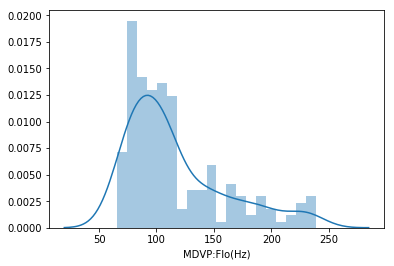

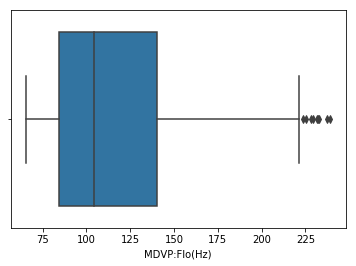

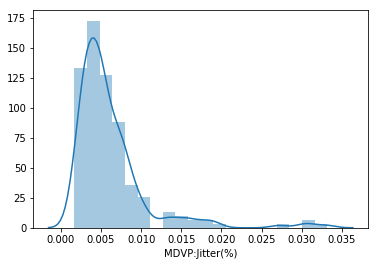

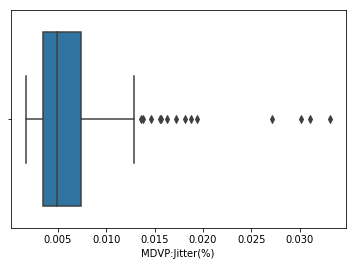

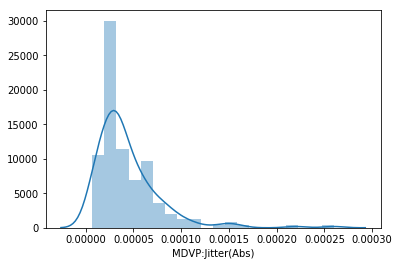

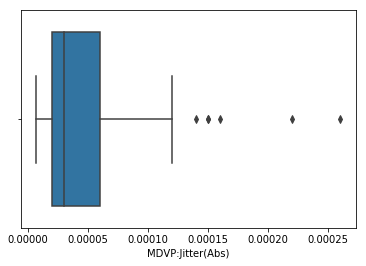

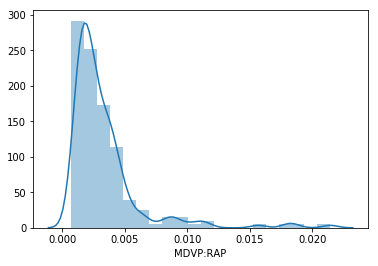

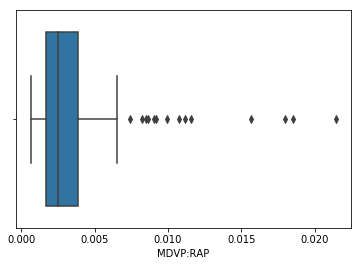

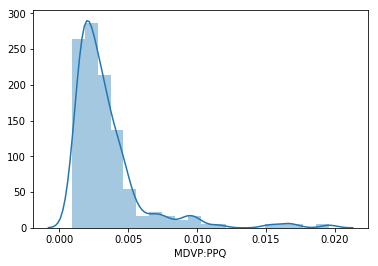

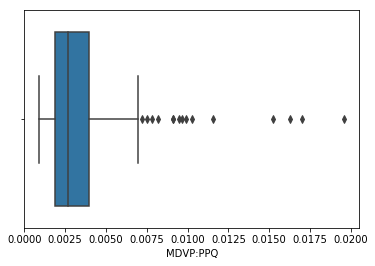

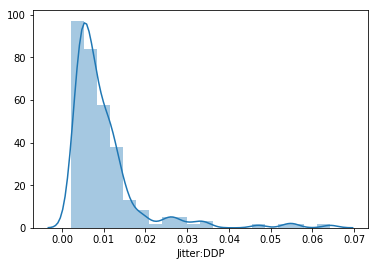

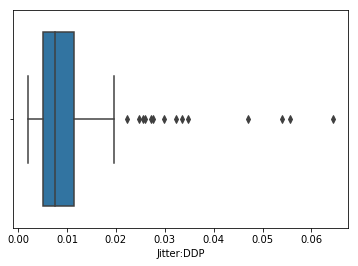

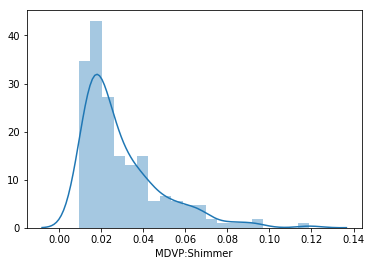

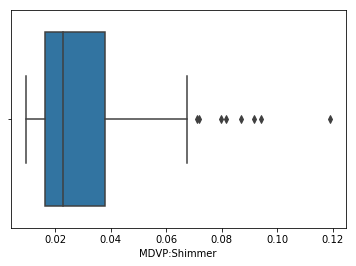

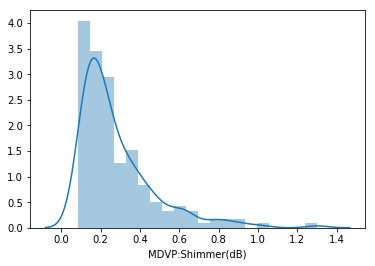

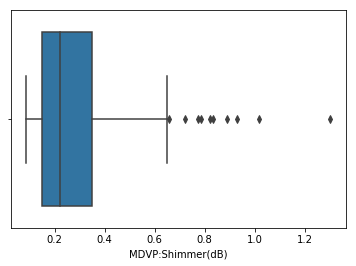

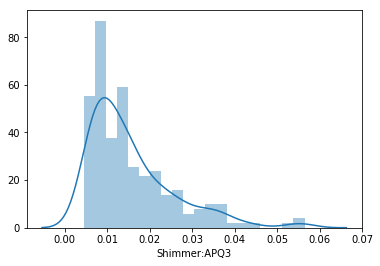

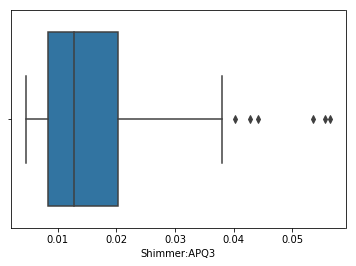

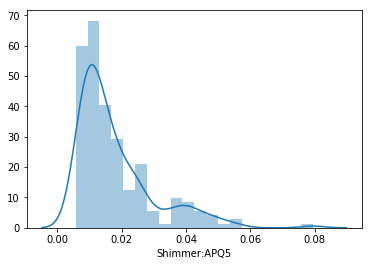

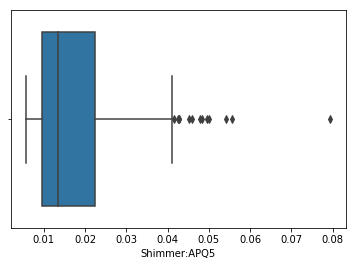

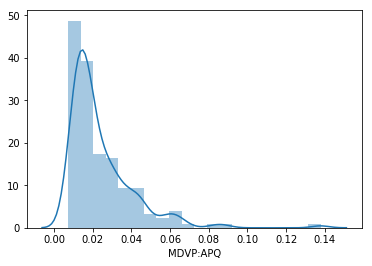

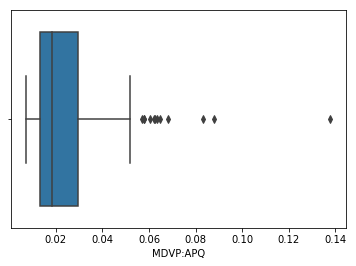

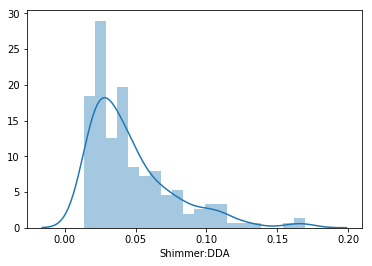

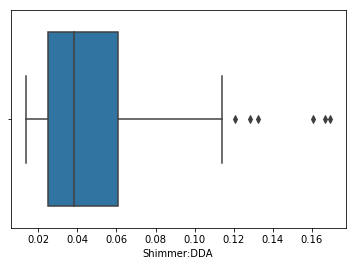

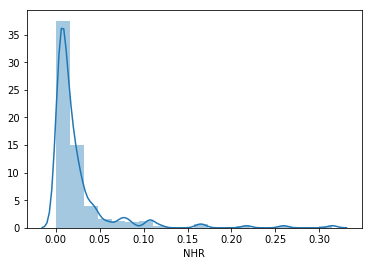

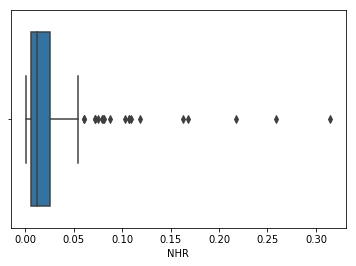

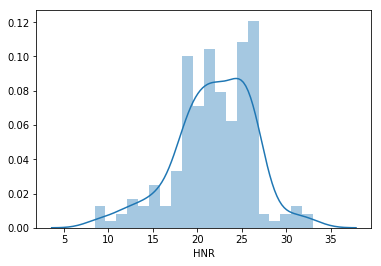

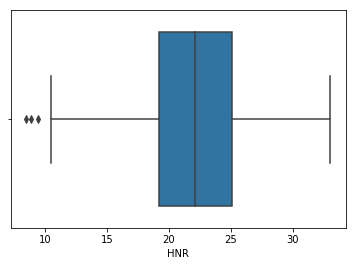

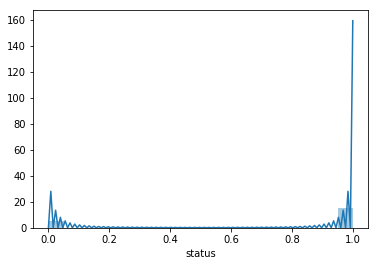

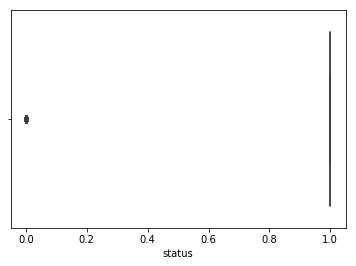

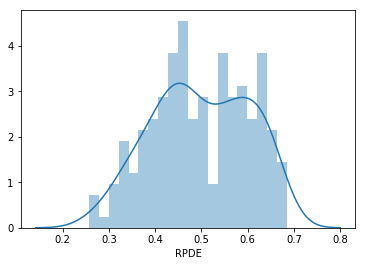

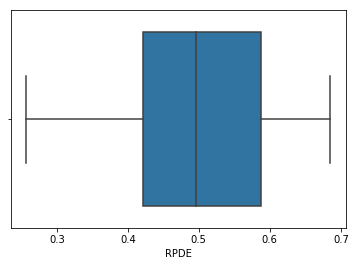

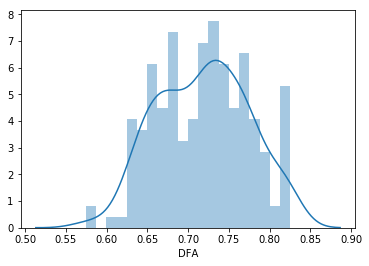

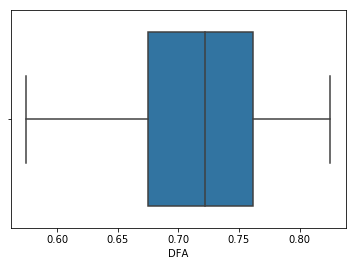

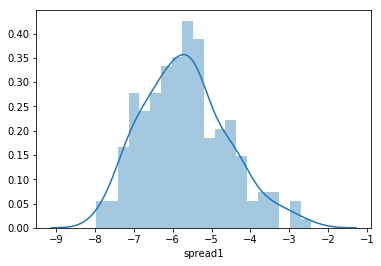

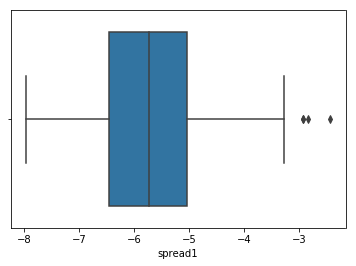

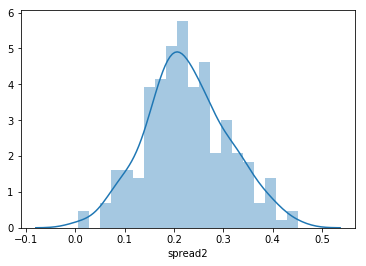

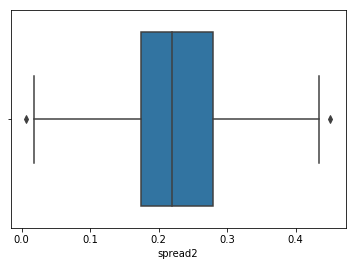

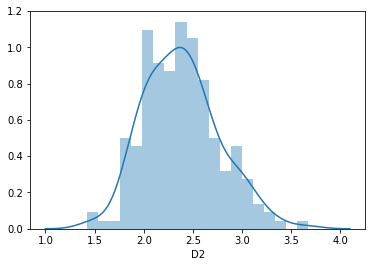

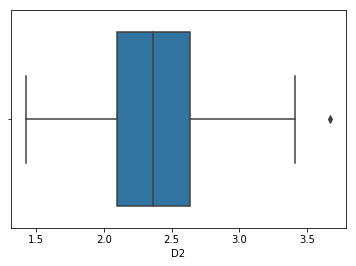

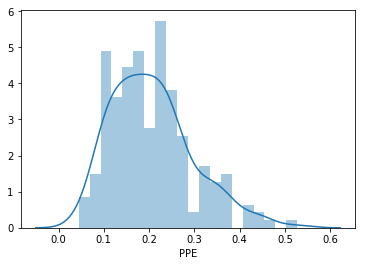

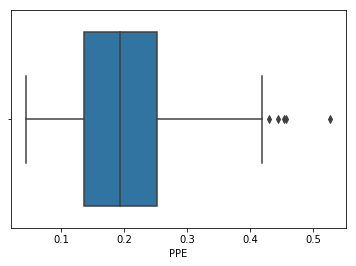

In [10]:
#Univariate: To plot the graph of all features other than Name, as it is a Object type

parkinson_data = parkinson_data.iloc[:, 1:]


for column in parkinson_data:

    sns.distplot(parkinson_data[column], bins=20)
    plt.show()

    sns.boxplot(parkinson_data[column])
    plt.show()

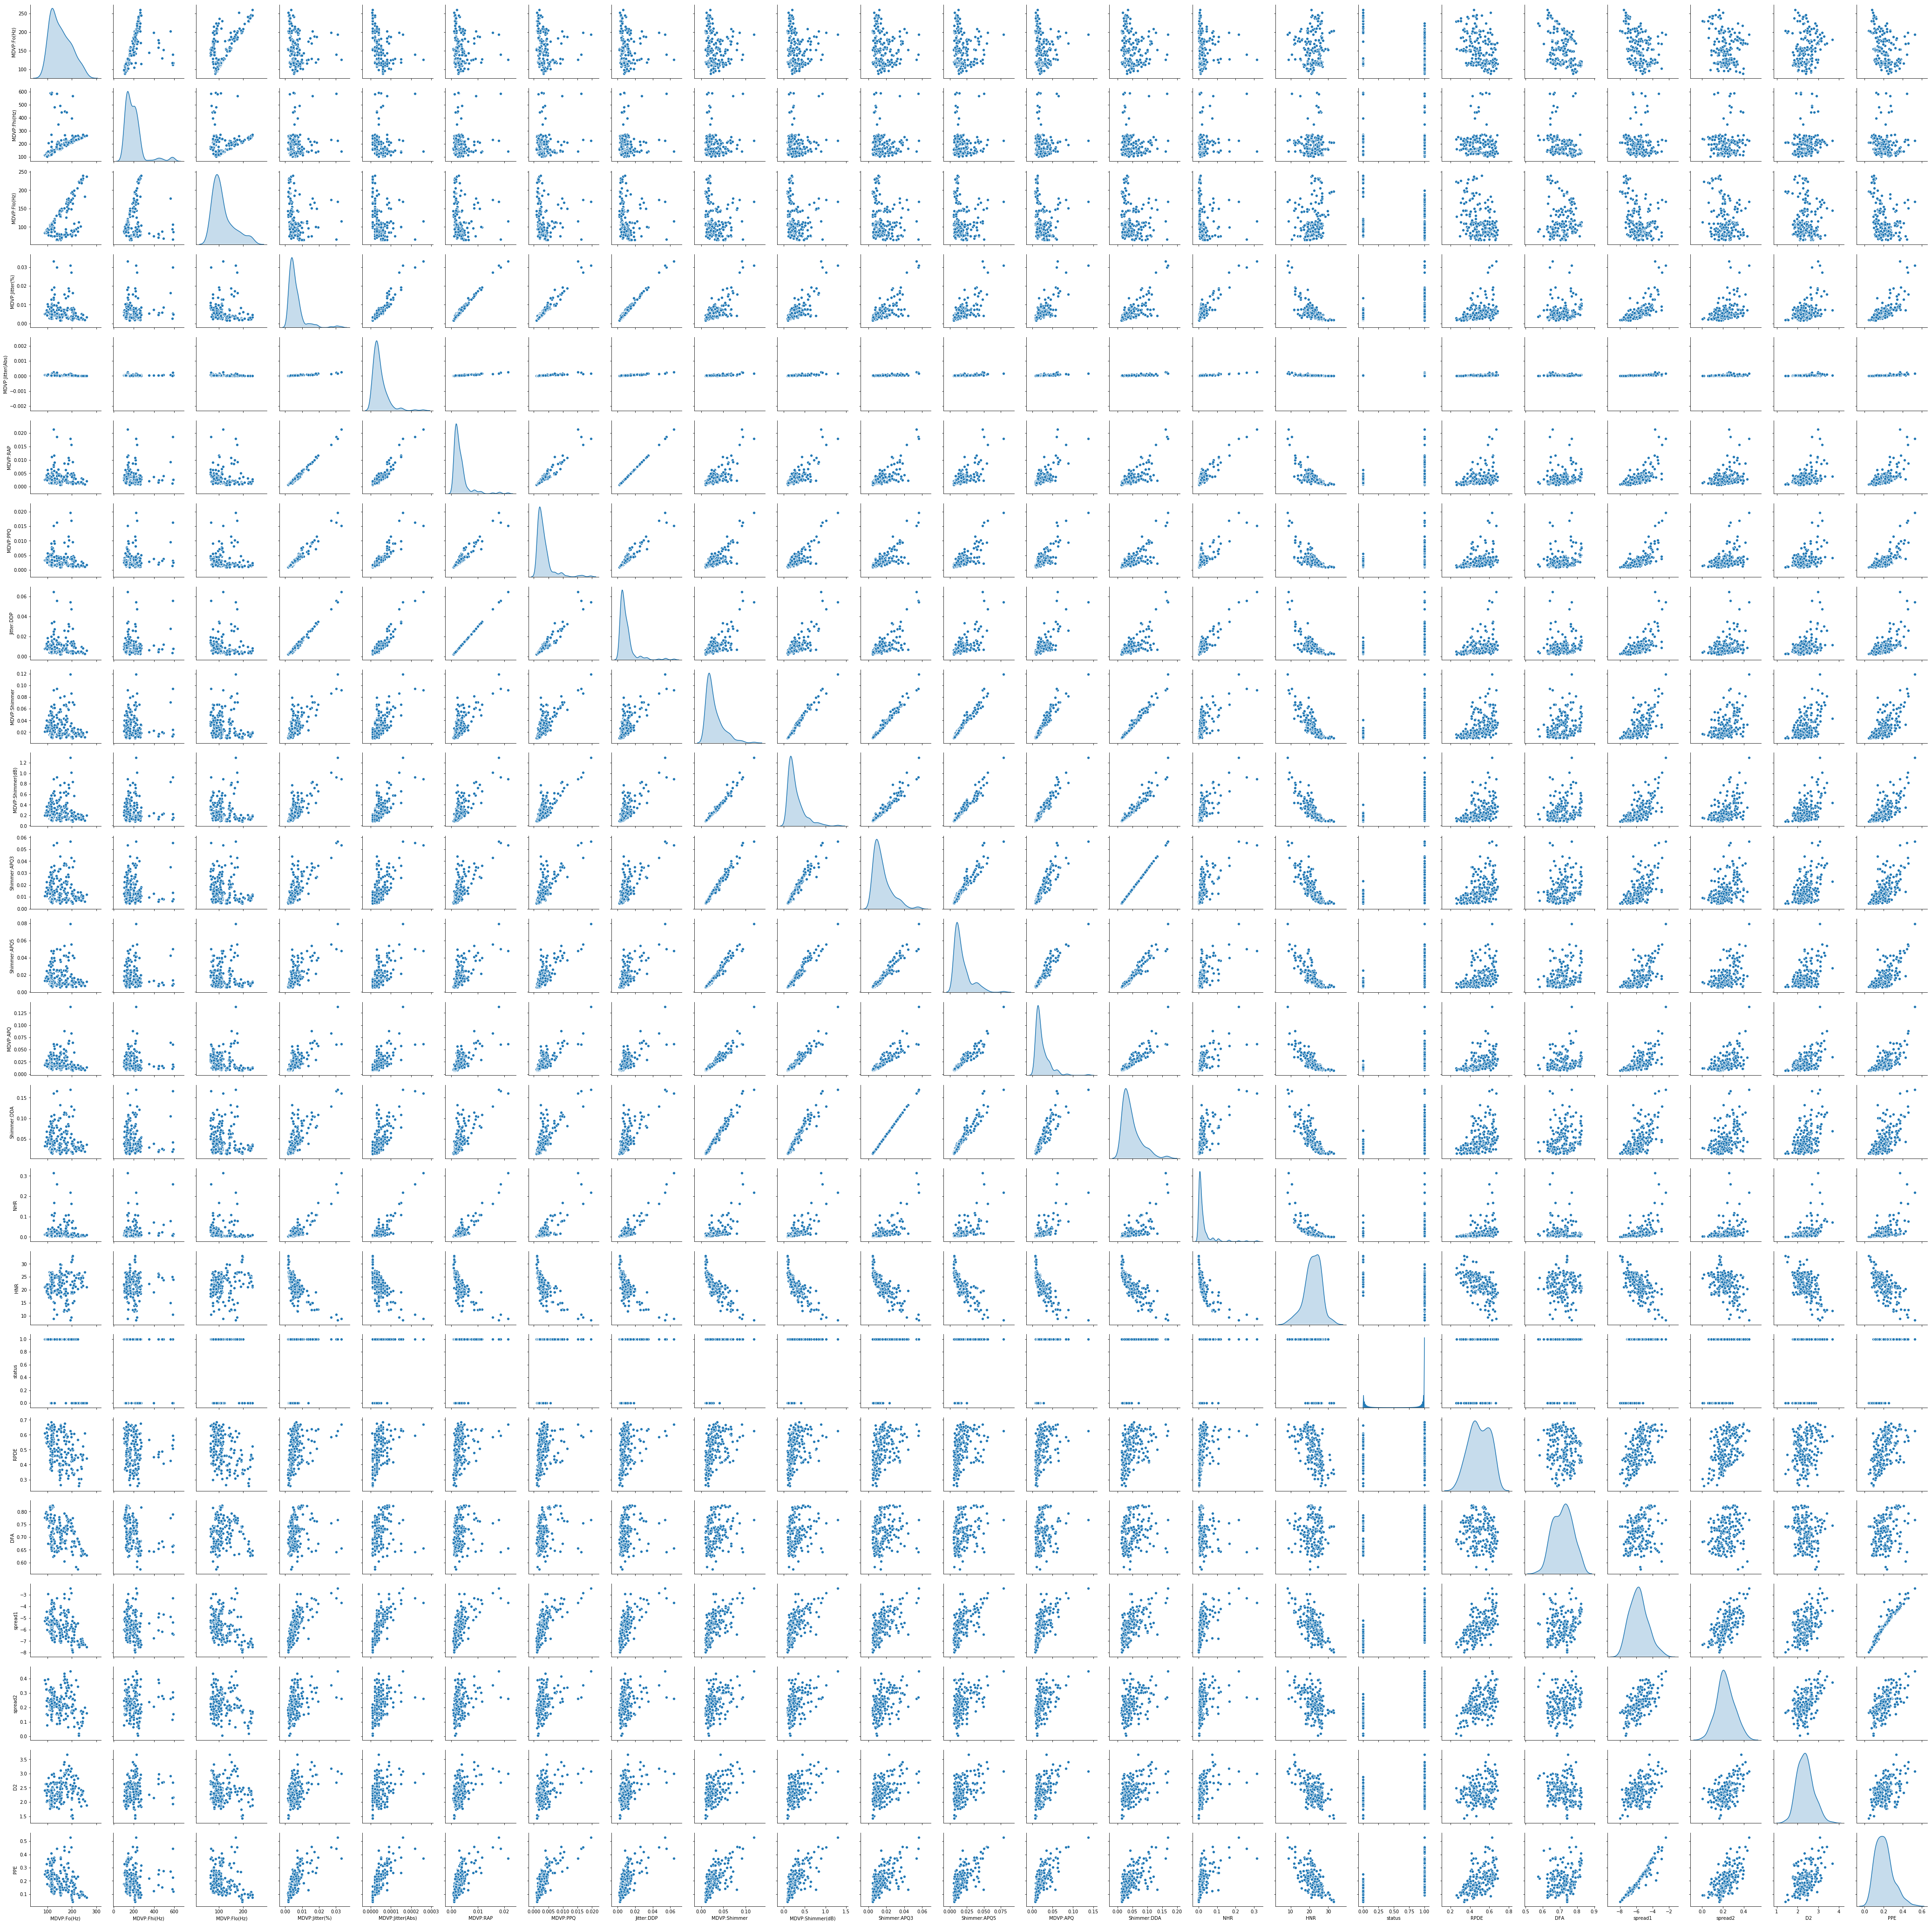

In [11]:
# Bivariate
sns.pairplot(parkinson_data, diag_kind='kde')

C:\Users\ABHIJEET\Anaconda4\lib\site-packages\matplotlib\pyplot.py:514: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


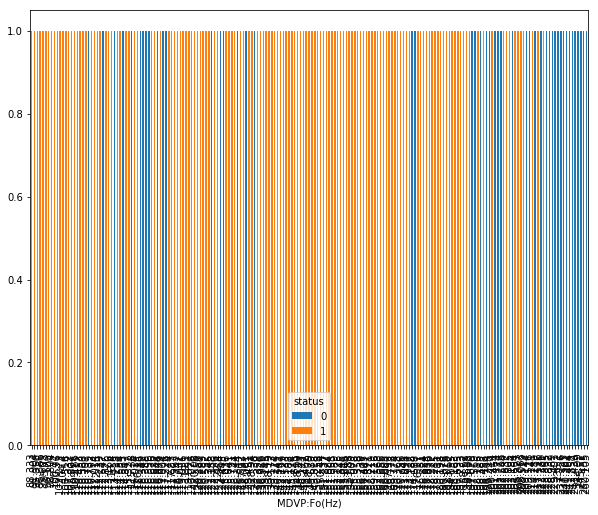

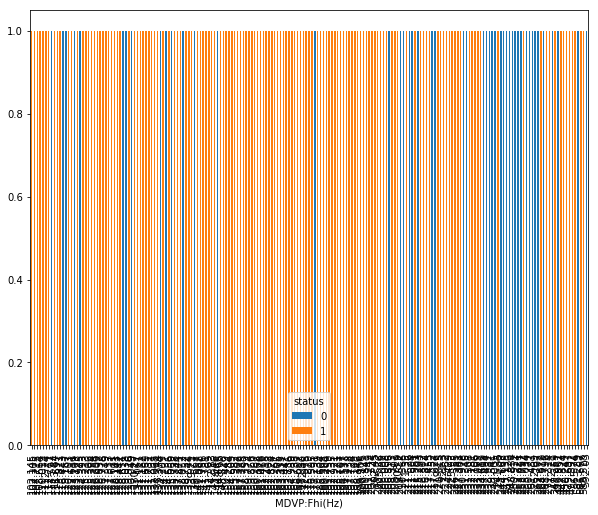

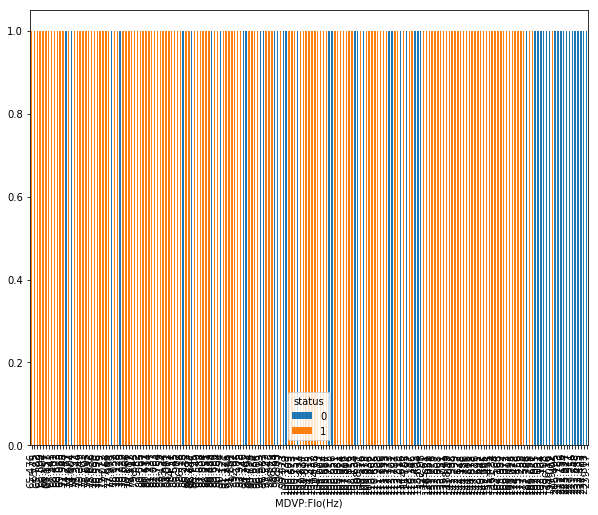

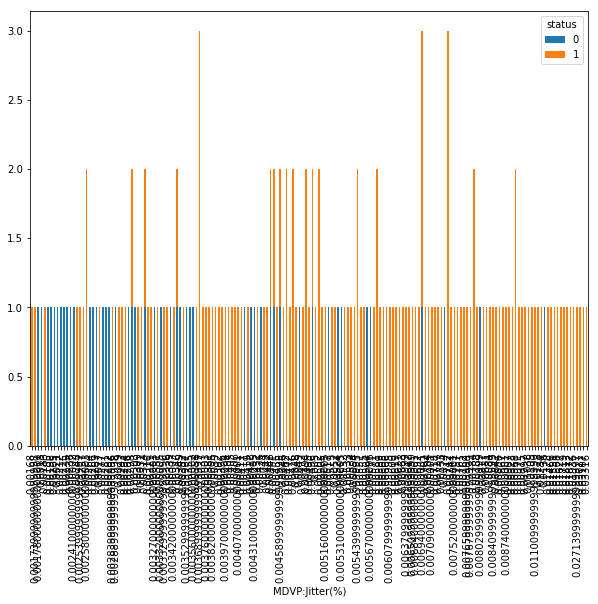

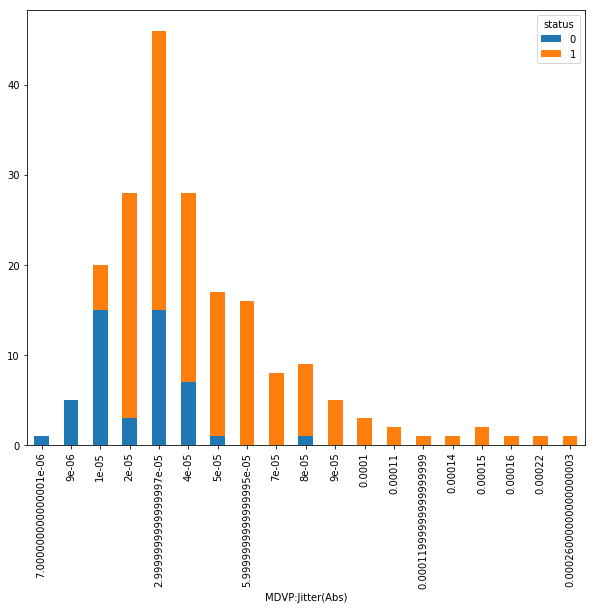

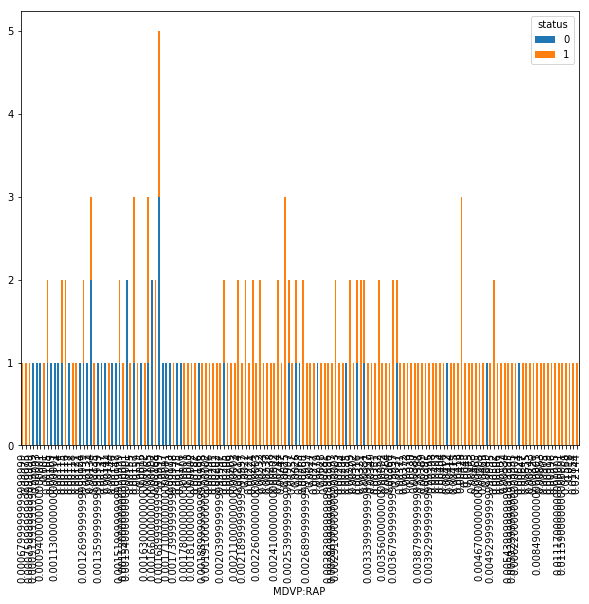

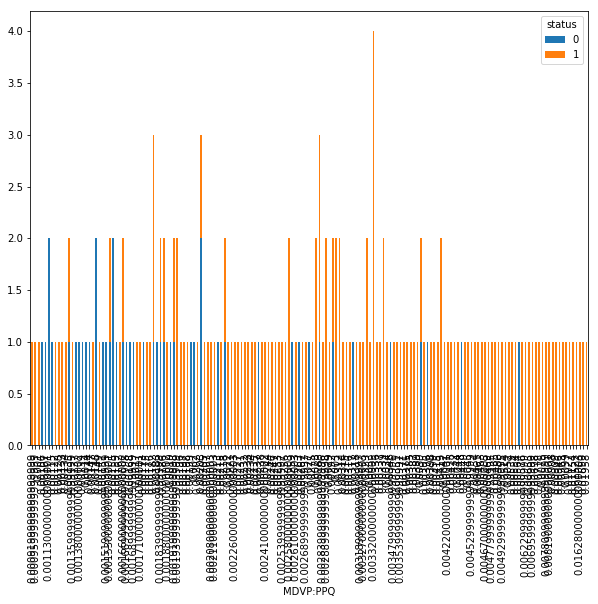

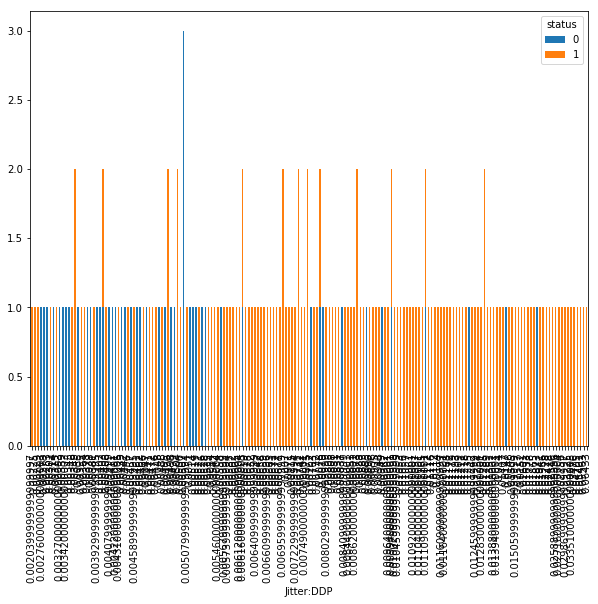

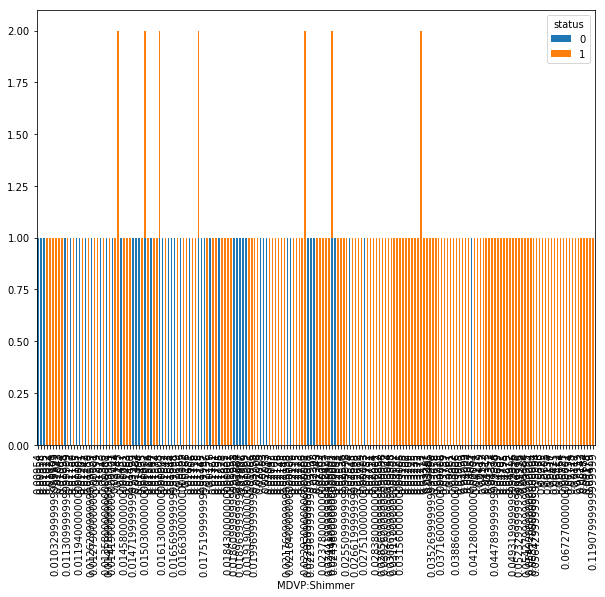

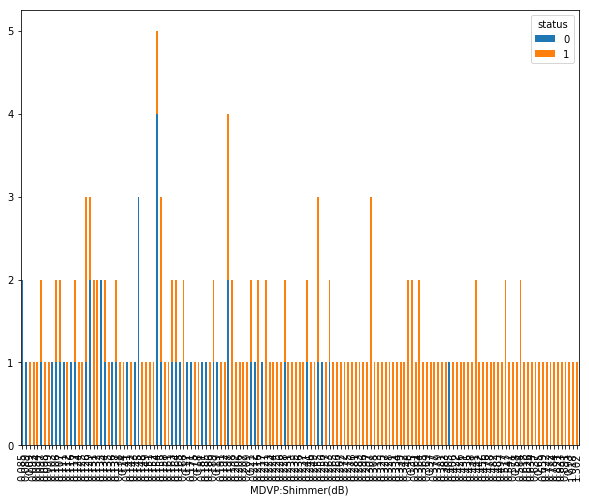

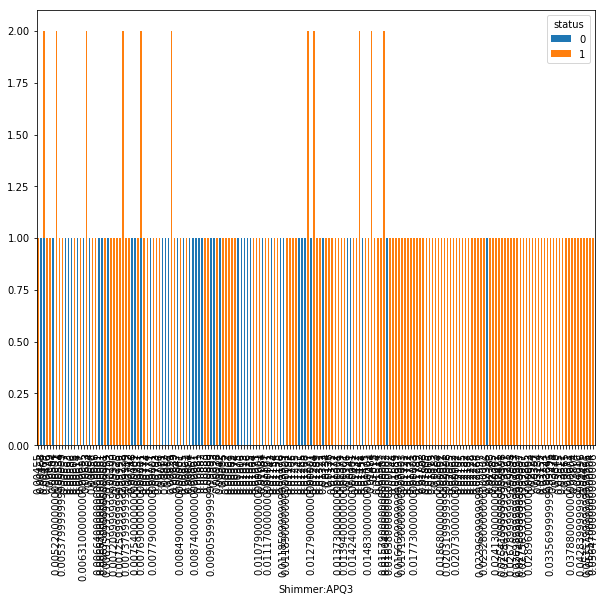

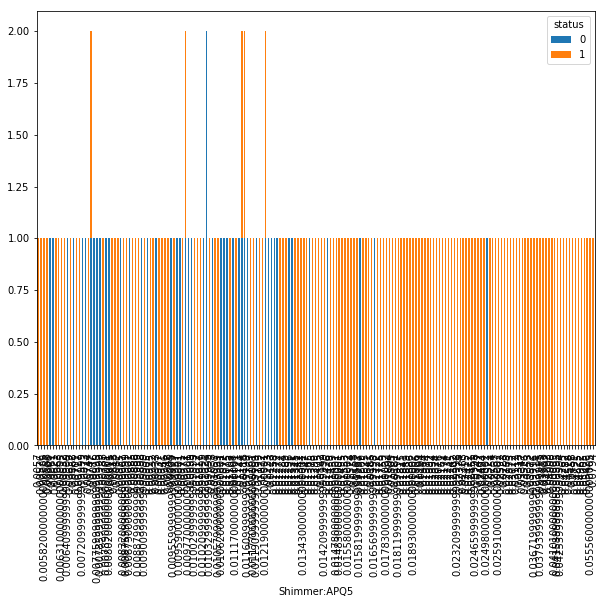

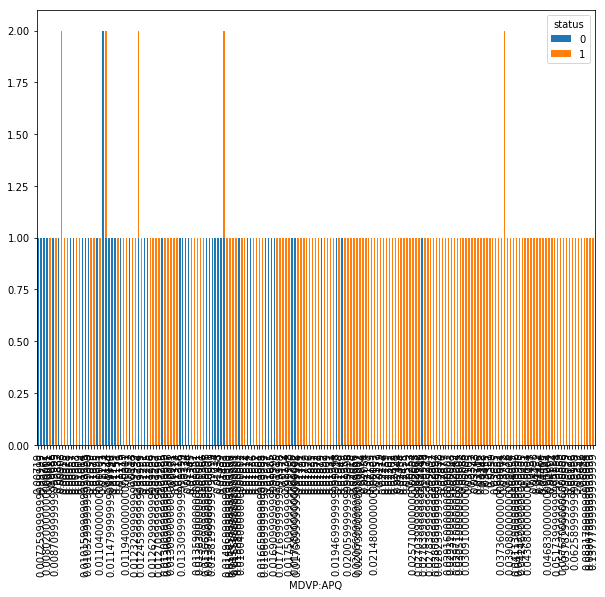

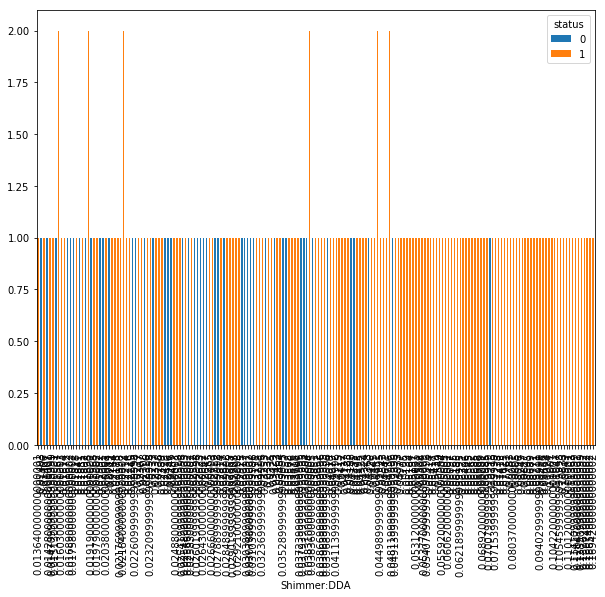

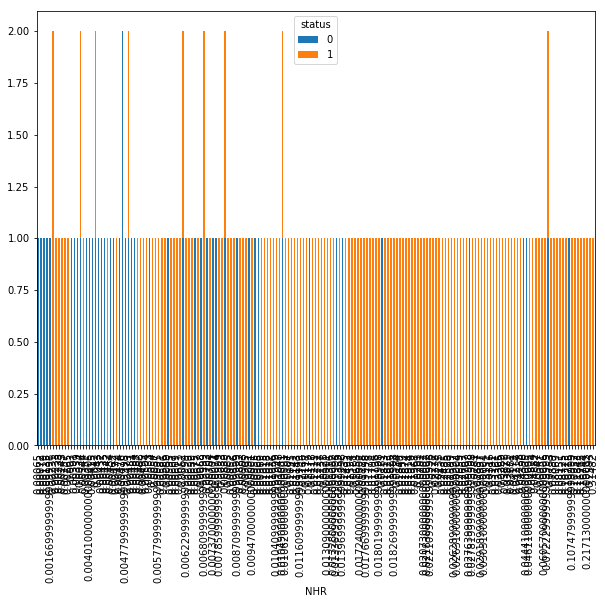

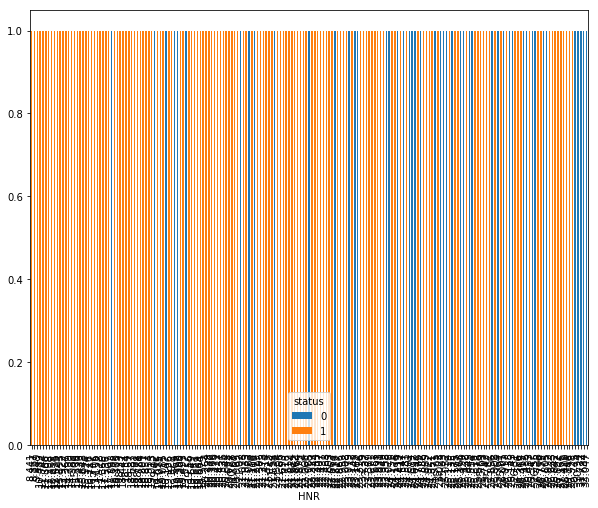

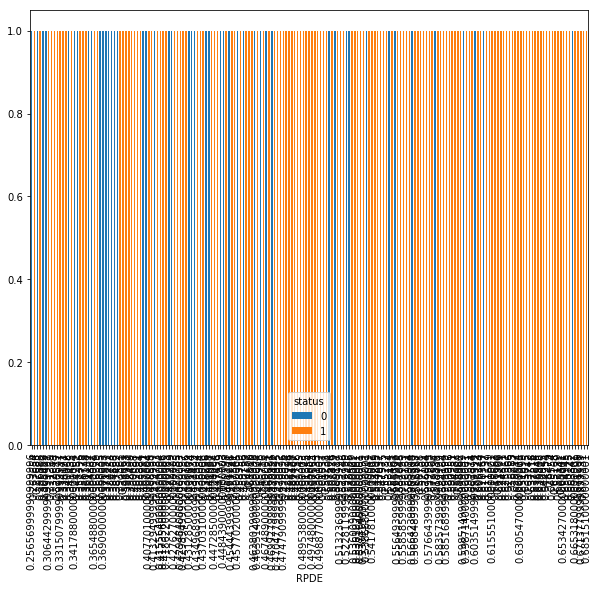

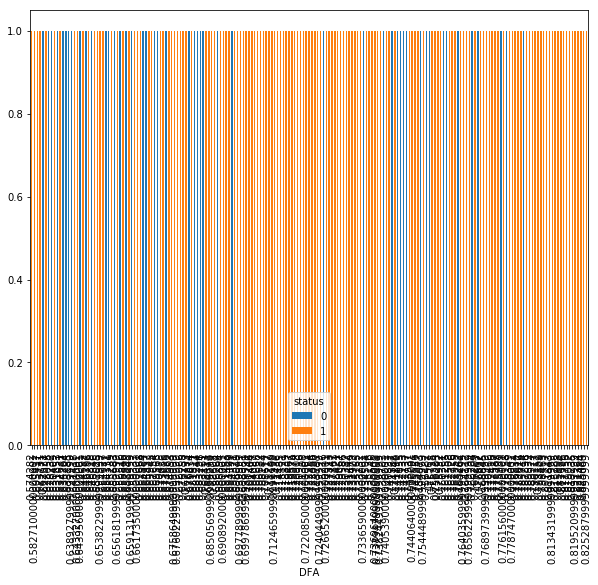

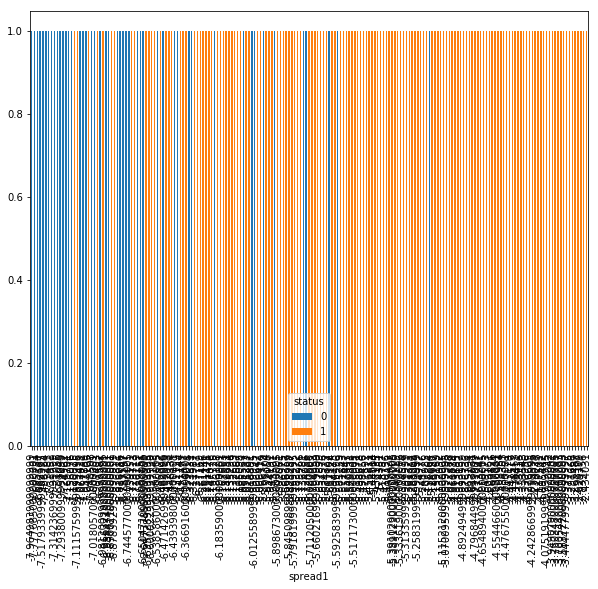

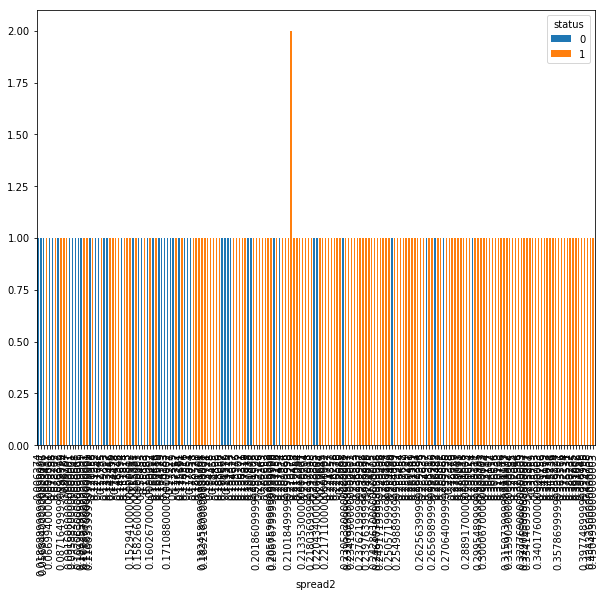

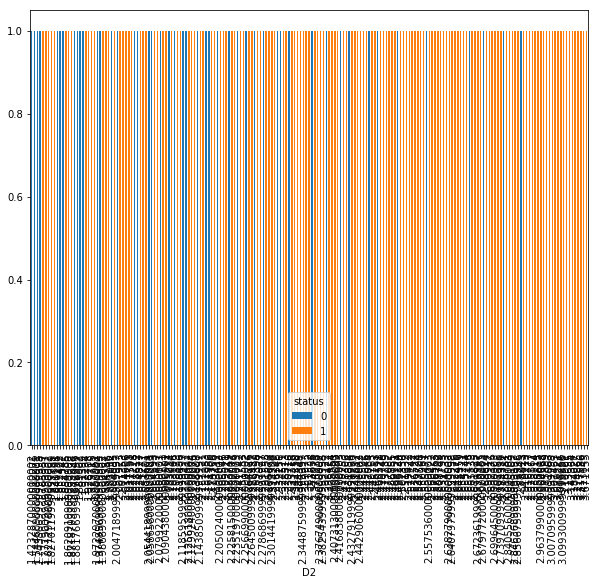

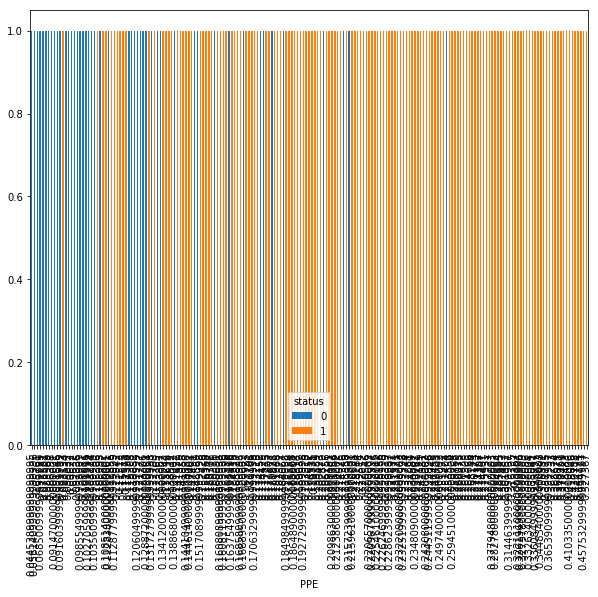

In [75]:
# Bivariate: Plotting the graphs of all the features by linking it with dependent variable
for i in X.columns:
    parkinson_data.groupby(i)['status'].value_counts().unstack().plot(kind = 'bar', stacked = True, figsize = (10,8))

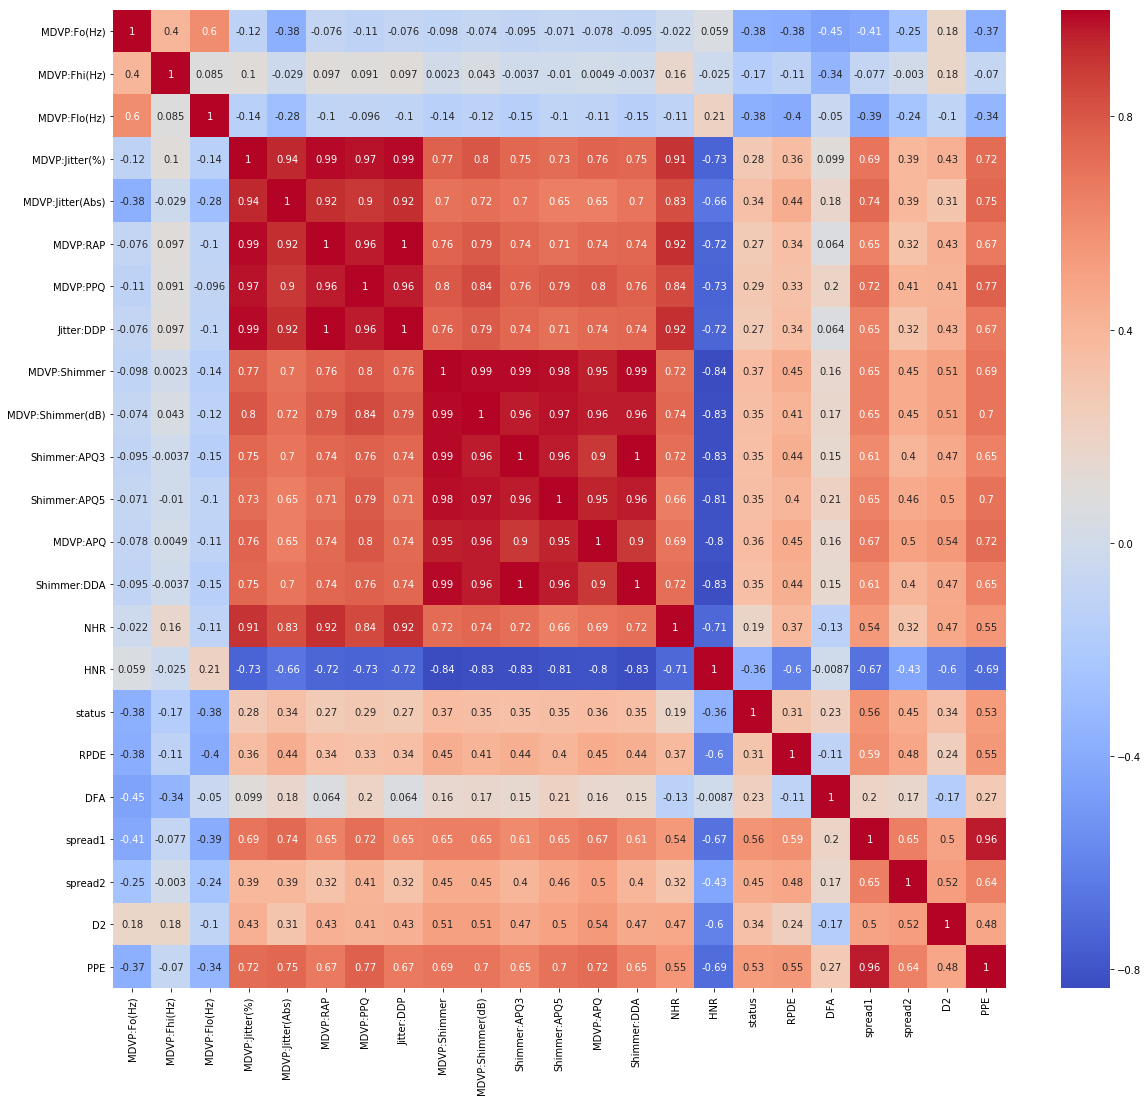

In [20]:
# sns.heatmap(thera.corr())
# plt.show()
corr = parkinson_data.corr()
fig = plt.figure(figsize = (20,18))
sns.heatmap(corr, annot = True, cmap = "coolwarm")

In [29]:
# Finding Corelating between dependent variables with others 
corr.status

MDVP:Fo(Hz)        -0.383535
MDVP:Fhi(Hz)       -0.166136
MDVP:Flo(Hz)       -0.380200
MDVP:Jitter(%)      0.278220
MDVP:Jitter(Abs)    0.338653
MDVP:RAP            0.266668
MDVP:PPQ            0.288698
Jitter:DDP          0.266646
MDVP:Shimmer        0.367430
MDVP:Shimmer(dB)    0.350697
Shimmer:APQ3        0.347617
Shimmer:APQ5        0.351148
MDVP:APQ            0.364316
Shimmer:DDA         0.347608
NHR                 0.189429
HNR                -0.361515
status              1.000000
RPDE                0.308567
DFA                 0.231739
spread1             0.564838
spread2             0.454842
D2                  0.340232
PPE                 0.531039
Name: status, dtype: float64

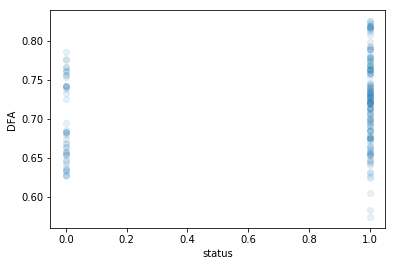

In [30]:
sns.regplot(data = parkinson_data, x = 'status', y = 'DFA', fit_reg = False,
           scatter_kws = {'alpha' : 0.1});


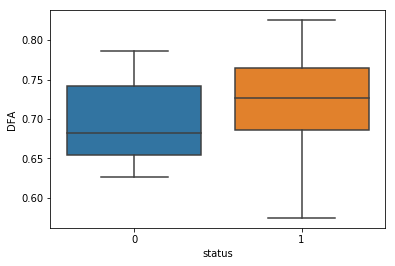

In [31]:
sns.boxplot(data=parkinson_data,x = 'status', y = 'DFA');

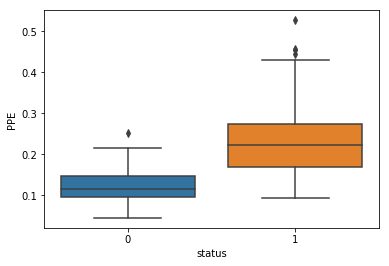

In [32]:
sns.boxplot(data=parkinson_data,x = 'status', y = 'PPE');

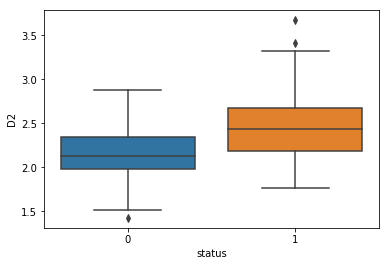

In [33]:
sns.boxplot(data=parkinson_data,x = 'status', y = 'D2');

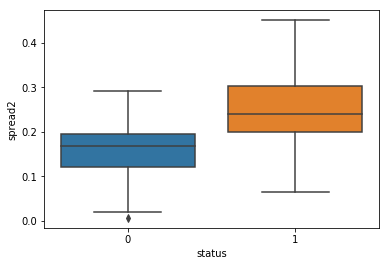

In [34]:
sns.boxplot(data=parkinson_data,x = 'status', y = 'spread2');

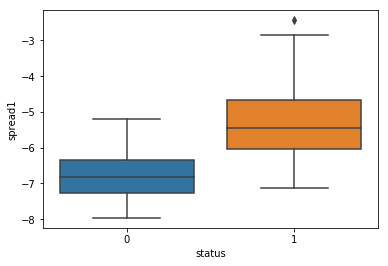

In [35]:
sns.boxplot(data=parkinson_data,x = 'status', y = 'spread1');

### Summary of Univariate and Bivatiate Analysis

If we look at this heat map and rest of the plots, we can see a number of things. First of all, as we might intuit, the multiple types of "jitter", or measures in variation of fundamental frequency of speaking, as well as the multiple types of "shimmer", or measures in variation of amplitude of speaking, are very correlated with each other. Also, we can see that many of the measures of speech in general are correlated with each other. Because jitter and shimmer are so correlated, it might make sense to only use one of the measurements or perhaps reduce their dimensions with a principle component analysis. We can also see from this heat map that HNR, and DFA all seem to have more correlation (or anti-correlation) with Status than the other measures. Let's get an exact measurement on how things correlate with Status.

#### Perhaps not surprisingly, Spread1 is the strongest correlate with Status. After Spread1, PPE, Spread2, MDVP:Shimmer, MDVP:APQ, and so on.... seem to be the strongest correlates.


### 4. Split the dataset into training and test set in the ratio of 70:30

In [36]:
X = parkinson_data[['MDVP:Fo(Hz)','MDVP:Fhi(Hz)','MDVP:Flo(Hz)','MDVP:Jitter(%)','MDVP:Jitter(Abs)','MDVP:RAP','MDVP:PPQ','Jitter:DDP','MDVP:Shimmer','MDVP:Shimmer(dB)','Shimmer:APQ3','Shimmer:APQ5','MDVP:APQ','Shimmer:DDA','NHR','HNR','RPDE','DFA','spread1','spread2','D2','PPE']]

y = parkinson_data["status"]
  
# Spliting the dataset into train and test 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 100) 
      
# print( X, y, X_train, X_test, y_train, y_test) 

###  5. Create the model using “entropy” method of reducing the entropy and fit it to training data.

In [37]:
# Importing the required libraries and packages 

In [38]:
from sklearn.tree import DecisionTreeClassifier, export_graphviz
from sklearn.tree import DecisionTreeClassifier 
from sklearn.metrics import accuracy_score 
from sklearn.metrics import classification_report


In [39]:
# Create Decision Tree classifer object using entropy
clftree = DecisionTreeClassifier(criterion= 'entropy')

# Fit the classifier to train data
clftree = clftree.fit(X_train,y_train)



### 6. Test the model on test data and what is the accuracy achieved. Capture the predicted values and do a crosstab.

In [40]:
print("Score:",clftree.score(X_test,y_test))

Score: 0.7288135593220338


In [41]:
# Predict the values?
y_pred = clftree.predict(X_test) 
print("Predicted values:", y_pred) 

Predicted values: [1 0 1 1 1 1 0 1 1 0 0 0 1 1 1 1 1 0 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 0 0 0 1
 1 1 1 1 1 0 0 1 0 0 0 1 1 1 1 0 1 0 1 0 1 1]


In [42]:
from sklearn.metrics import confusion_matrix    

print("Confusion Matrix: ", confusion_matrix(y_test, y_pred)) 
      


Confusion Matrix:  [[ 7  5]
 [11 36]]


In [43]:
print ("Accuracy : ", accuracy_score(y_test,y_pred)*100,"%")  


Accuracy :  72.88135593220339 %


In [44]:
print("Report : ",  classification_report(y_test, y_pred)) 

Report :                precision    recall  f1-score   support

           0       0.39      0.58      0.47        12
           1       0.88      0.77      0.82        47

   micro avg       0.73      0.73      0.73        59
   macro avg       0.63      0.67      0.64        59
weighted avg       0.78      0.73      0.75        59



### Ensemble Learning - Bagging


In [45]:
from sklearn.ensemble import BaggingClassifier

bagging = BaggingClassifier(base_estimator=clftree, n_estimators=50)

#bgcl = BaggingClassifier(n_estimators=50)
bagging = bagging.fit(X_train, y_train)

In [46]:
clftree.score(X_test , y_test)

0.7288135593220338

In [47]:
yepredt = bagging.predict(X_test)
print(metrics.confusion_matrix(y_test, yepredt))

[[ 9  3]
 [ 3 44]]


In [48]:
clftree.score(X_test , y_test) 

0.7288135593220338

### Ensemble RandomForest Classifier

In [49]:
from sklearn.ensemble import RandomForestClassifier
randomf = RandomForestClassifier(n_estimators = 85)
randomf = randomf.fit(X_train, y_train)

In [50]:
yrpredt = randomf.predict(X_test)
print(metrics.confusion_matrix(y_test, yrpredt))

[[ 8  4]
 [ 5 42]]


### Ensemble Learning - AdaBoosting

In [51]:
from sklearn.ensemble import AdaBoostClassifier
adaboost = AdaBoostClassifier(base_estimator=clftree, n_estimators=10)
#abcl = AdaBoostClassifier( n_estimators=50)
adaboost = adaboost.fit(X_train, y_train)

In [52]:
yapredt = adaboost.predict(X_test)
print(adaboost.score(X_test , y_test))

print(metrics.confusion_matrix(y_test, yapredt))

0.7288135593220338
[[ 7  5]
 [11 36]]


#### Based on the heatmap plotted above and the Corr funtion used, it is noticed that column DFA, D2, Spread1, Spread2 and PPE is highly dependent on Status (Independent Variable). Hence the cross tab is performed on DFA

In [53]:
# Crosstab between Status(Dependent) and DFA(Independent)
pd.crosstab(parkinson_data.status, parkinson_data.DFA, margins=True)

DFA     0.574282  0.5827100000000001  0.605417  0.623731  0.62671  0.627337  \
status                                                                        
0              0                   0         0         0        1         0   
1              1                   1         1         1        0         1   
All            1                   1         1         1        1         1   

DFA     0.628058  0.628232  0.630409  0.631653  ...  0.817396  0.817756  \
status                                          ...                       
0              1         1         0         1  ...         0         0   
1              0         0         1         0  ...         1         1   
All            1         1         1         1  ...         1         1   

DFA     0.819032  0.819235  0.8195209999999999  0.821364  0.823484  0.825069  \
status                                                                         
0              0         0                   0         0         0         0   
1              1         1                   1         1         1         1   
All            1         1                   1         1         1         1   

DFA     0.8252879999999999  All  
status                           
0                        0   48  
1                        1  147  
All                      1  195  

[3 rows x 196 columns]

In [54]:
# Crosstab between Status(Dependent) and PPE(Independent)
pd.crosstab(parkinson_data.status, parkinson_data.PPE, margins=True)

PPE     0.044538999999999995  0.056140999999999996  0.05761  \
status                                                        
0                          1                     1        1   
1                          0                     0        0   
All                        1                     1        1   

PPE     0.06850099999999999  0.073581  0.075587  0.085569  0.086398  \
status                                                                
0                         1         1         1         1         1   
1                         0         0         0         0         0   
All                       1         1         1         1         1   

PPE     0.09147000000000001  0.091546  ...  0.377429  0.378483  \
status                                 ...                       
0                         1         1  ...         0         0   
1                         0         0  ...         1         1   
All                       1         1  ...         1         1   

PPE     0.41033500000000006  0.418646  0.430788  0.444774  0.454721  \
status                                                                
0                         0         0         0         0         0   
1                         1         1         1         1         1   
All                       1         1         1         1         1   

PPE     0.45753299999999997  0.527367  All  
status                                      
0                         0         0   48  
1                         1         1  147  
All                       1         1  195  

[3 rows x 196 columns]

In [55]:
# Crosstab between Status(Dependent) and D2(Independent)
pd.crosstab(parkinson_data.status, parkinson_data.D2, margins=True)

D2      1.4232870000000002  1.512275  1.5446090000000001  1.7438669999999998  \
status                                                                         
0                        1         1                   1                   1   
1                        0         0                   0                   0   
All                      1         1                   1                   1   

D2      1.765957  1.7779009999999997  1.8212970000000002  1.8270119999999999  \
status                                                                         
0              0                   0                   0                   0   
1              1                   1                   1                   1   
All            1                   1                   1                   1   

D2      1.831691  1.840198  ...  3.0993009999999996  3.10901  3.13655  \
status                      ...                                         
0              0         1  ...                   0        0        0   
1              1         0  ...                   1        1        1   
All            1         1  ...                   1        1        1   

D2      3.142364  3.184027  3.274865  3.317586  3.413649  3.671155  All  
status                                                                   
0              0         0         0         0         0         0   48  
1              1         1         1         1         1         1  147  
All            1         1         1         1         1         1  195  

[3 rows x 196 columns]

In [56]:
# Crosstab between Status(Dependent) and spread1(Independent)
pd.crosstab(parkinson_data.status, parkinson_data.spread1, margins=True)

spread1  -7.964983999999999  -7.777685000000001  -7.695734  -7.682587  \
status                                                                  
0                         1                   1          1          1   
1                         0                   0          0          0   
All                       1                   1          1          1   

spread1  -7.5179339999999995  -7.496264  -7.3483  -7.31951  \
status                                                       
0                          1          1        1         1   
1                          0          0        0         0   
All                        1          1        1         1   

spread1  -7.314236999999999  -7.31055  ...  -3.5837220000000003  \
status                                 ...                        
0                         1         1  ...                    0   
1                         0         0  ...                    1   
All                       1         1  ...                    1   

spread1  -3.4444779999999997  -3.377325  -3.297668  -3.269487  -2.93107  \
status                                                                    
0                          0          0          0          0         0   
1                          1          1          1          1         1   
All                        1          1          1          1         1   

spread1  -2.929379  -2.839756  -2.434031  All  
status                                         
0                0          0          0   48  
1                1          1          1  147  
All              1          1          1  195  

[3 rows x 196 columns]

In [57]:
# Crosstab between Status(Dependent) and spread2(Independent)
pd.crosstab(parkinson_data.status, parkinson_data.spread2, margins=True)

spread2  0.006274  0.018688999999999997  0.056844000000000006  0.063412  \
status                                                                    
0               1                     1                     1         0   
1               0                     0                     0         1   
All             1                     1                     1         1   

spread2  0.06699400000000001  0.073298  0.078202  0.086372  \
status                                                       
0                          1         1         0         1   
1                          0         0         1         0   
All                        1         1         1         1   

spread2  0.08716499999999999  0.08784  ...  0.389232  0.389295  0.391002  \
status                                 ...                                 
0                          0        0  ...         0         0         0   
1                          1        1  ...         1         1         1   
All                        1        1  ...         1         1         1   

spread2  0.393056  0.396746  0.39774899999999996  0.414758  \
status                                                       
0               0         0                    0         0   
1               1         1                    1         1   
All             1         1                    1         1   

spread2  0.43432600000000005  0.45049300000000003  All  
status                                                  
0                          0                    0   48  
1                          1                    1  147  
All                        1                    1  195  

[3 rows x 195 columns]

#### Method 2 for finding crosstab

In [58]:
# Method 2 for finding crosstab
X_conc = pd.concat ([X_test, y_test], axis = 1)
X_conc['predict_test'] = y_pred

In [59]:
print(X_test.shape, y_test.shape, len(y_pred), X_conc.shape)

(59, 22) (59,) 59 (59, 24)


In [60]:
X_conc.head()

MDVP:Fo(Hz)  MDVP:Fhi(Hz)  MDVP:Flo(Hz)  MDVP:Jitter(%)  \
164      102.273       142.830        85.902         0.00907   
188      114.563       119.167        86.647         0.00327   
146      169.774       191.759       151.451         0.01568   
126      138.145       197.238        81.114         0.00544   
151      192.818       224.429       168.793         0.03107   

     MDVP:Jitter(Abs)  MDVP:RAP  MDVP:PPQ  Jitter:DDP  MDVP:Shimmer  \
164           0.00009   0.00493   0.00461     0.01480       0.02814   
188           0.00003   0.00146   0.00184     0.00439       0.01185   
146           0.00009   0.00863   0.00946     0.02589       0.08143   
126           0.00004   0.00294   0.00327     0.00883       0.02791   
151           0.00016   0.01800   0.01958     0.05401       0.11908   

     MDVP:Shimmer(dB)  ...      NHR     HNR      RPDE       DFA   spread1  \
164             0.272  ...  0.03882  18.447  0.671378  0.674562 -2.929379   
188             0.106  ...  0.00703  24.775  0.555303  0.659132 -6.710219   
146             0.821  ...  0.07530  12.359  0.561610  0.793509 -3.297668   
126             0.246  ...  0.01794  18.178  0.623209  0.738245 -5.540351   
151             1.302  ...  0.21713   8.441  0.625866  0.768320 -2.434031   

      spread2        D2       PPE  status  predict_test  
164  0.396746  2.560422  0.367233       1             1  
188  0.149694  1.913990  0.121777       0             0  
146  0.414758  3.413649  0.457533       1             1  
126  0.087165  1.821297  0.214075       1             1  
151  0.450493  3.079221  0.527367       1             1  

[5 rows x 24 columns]

In [61]:
pd.crosstab(X_conc.predict_test, X_conc.status, margins=True)

status         0   1  All
predict_test             
0              7  11   18
1              5  36   41
All           12  47   59

### 7. Use regularization parameters of max_depth, min_sample_leaf to recreate the model. What is the impact on the model accuracy? How does regularization help?

### Decision Tree for first Entropy

In [62]:
# Decision tree with entropy using max_depth=2 and min_sample leaf = 4
clf_entropy = DecisionTreeClassifier(criterion = "entropy", random_state = 100, max_depth = 2, min_samples_leaf = 3) 
  
    # Performing training 
clf_entropy.fit(X_train, y_train) 
clf_entropy 

DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=2,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=3, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=100,
            splitter='best')

In [63]:
 # Predicton on test with entropy 
y_pred1 = clf_entropy.predict(X_test) 
print("Predicted values:") 
print(y_pred1) 


Predicted values:
[1 1 1 1 1 1 1 1 1 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 1
 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1]


In [64]:
print ("Accuracy of Entropy Model 1 : ", accuracy_score(y_test,y_pred1)*100,"%")  

Accuracy of Entropy Model 1 :  86.4406779661017 %


### Decision Tree for second Entropy

In [65]:
# Decision tree with entropy using max_depth=3 and min_sample leaf = 5
clf_entropy1 = DecisionTreeClassifier(criterion = "entropy", random_state = 100, max_depth = 3, min_samples_leaf = 5) 
  
    # Performing training 
clf_entropy1.fit(X_train, y_train) 
clf_entropy1 

DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=3,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=5, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=100,
            splitter='best')

In [66]:
 # Predicton on test with entropy 
y_pred2 = clf_entropy1.predict(X_test) 
print("Predicted values:") 
print(y_pred2) 

Predicted values:
[1 0 1 1 1 1 0 1 1 0 0 1 1 1 1 1 1 0 1 1 0 1 0 1 1 1 1 1 1 1 1 1 1 0 0 0 1
 1 1 1 1 1 0 0 1 0 0 0 1 1 1 0 0 1 0 1 0 1 1]


In [67]:
print ("Accuracy of Entropy Model 2 : ", accuracy_score(y_test,y_pred2)*100,"%")  

Accuracy of Entropy Model 2 :  71.1864406779661 %


### Decision Tree for thrid Entropy

In [68]:
# Decision tree with entropy using max_depth=6 and min_sample leaf = 9
clf_entropy2 = DecisionTreeClassifier(criterion = "entropy", random_state = 100, max_depth = 4, min_samples_leaf = 6) 
  
    # Performing training 
clf_entropy2.fit(X_train, y_train) 
clf_entropy2 

DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=4,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=6, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=100,
            splitter='best')

In [69]:
 # Predicton on test with entropy 
y_pred3 = clf_entropy1.predict(X_test) 
print("Predicted values:") 
print(y_pred3) 

Predicted values:
[1 0 1 1 1 1 0 1 1 0 0 1 1 1 1 1 1 0 1 1 0 1 0 1 1 1 1 1 1 1 1 1 1 0 0 0 1
 1 1 1 1 1 0 0 1 0 0 0 1 1 1 0 0 1 0 1 0 1 1]


In [70]:
print ("Accuracy of Entropy Model 3 : ", accuracy_score(y_test,y_pred2)*100,"%")  

Accuracy of Entropy Model 3 :  71.1864406779661 %


By predicting the model for three types of Entropy it has been analysed that by increasing the depth and the leaf the model accuracy reduces. 

It is also being analysed that by incresing the depth and leaf beyond the point of 3 and 5 accordingly, there is no change in the accuracy.

#### Printing the Confusion Matrix, Accuracy and Reports for Decision tree with Enthropy Model

In [71]:
from sklearn.metrics import confusion_matrix    

print("Confusion Matrix: ", confusion_matrix(y_test, y_pred)) 
      
print ("Accuracy : ", accuracy_score(y_test,y_pred)*100) 
      
print("Report : ",  classification_report(y_test, y_pred)) 

Confusion Matrix:  [[ 7  5]
 [11 36]]
Accuracy :  72.88135593220339
Report :                precision    recall  f1-score   support

           0       0.39      0.58      0.47        12
           1       0.88      0.77      0.82        47

   micro avg       0.73      0.73      0.73        59
   macro avg       0.63      0.67      0.64        59
weighted avg       0.78      0.73      0.75        59



### Visualization of decision tree for second Entropy model

In [72]:
from sklearn import tree 
from sklearn.tree import export_graphviz
import pydotplus
from sklearn.externals.six import StringIO  
from IPython.display import Image  



In [73]:
import os

os.environ['PATH'] = os.environ['PATH']+';'+os.environ['CONDA_PREFIX']+r"\Library\bin\graphviz"

In [74]:
dot_data = StringIO()
export_graphviz(clf_entropy2, out_file=dot_data,  
                filled=True, rounded=True,
                special_characters=True)

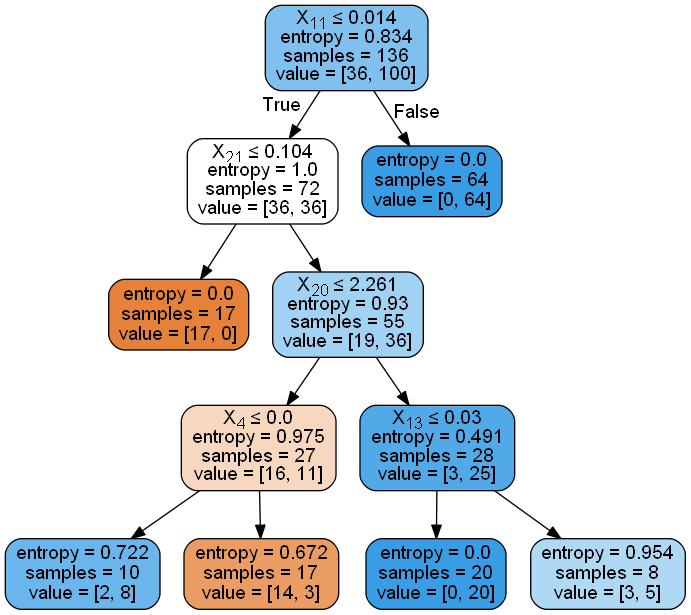

In [75]:
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
Image(graph.create_png())

### 8.  Next implement the decision tree using Random Forest. What is the optimal number of trees that gives the best result?

In [76]:
# Importing required libraries for Random Forest Model
from collections import OrderedDict
from sklearn.ensemble import RandomForestClassifier

C:\Users\ABHIJEET\Anaconda4\lib\site-packages\sklearn\ensemble\forest.py:458: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
C:\Users\ABHIJEET\Anaconda4\lib\site-packages\sklearn\ensemble\forest.py:463: RuntimeWarning: invalid value encountered in true_divide
  predictions[k].sum(axis=1)[:, np.newaxis])
C:\Users\ABHIJEET\Anaconda4\lib\site-packages\sklearn\ensemble\forest.py:458: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
C:\Users\ABHIJEET\Anaconda4\lib\site-packages\sklearn\ensemble\forest.py:463: RuntimeWarning: invalid value encountered in true_divide
  predictions[k].sum(axis=1)[:, np.newaxis])
C:\Users\ABHIJEET\Anaconda4\lib\site-packages\sklearn\ensemble\forest.py:458: UserWarning: Some inputs do not have OOB scores. T

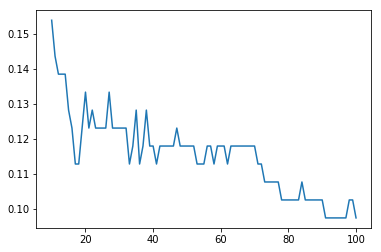

In [77]:
# Code to estimate the optimal number of trees, by visualing it through graph 
ensemble_clfs = [ ("RandomForestClassifier, max_features=None",RandomForestClassifier(warm_start=True, max_features=None, oob_score=True,))]
error_rate = OrderedDict((label, []) for label, _ in ensemble_clfs)

min_estimators = 10
max_estimators = 100
for label, clf in ensemble_clfs:
    for i in range(min_estimators, max_estimators + 1):
        clf.set_params(n_estimators=i)
        clf.fit(X, y)
        oob_error = 1 - clf.oob_score_
        error_rate[label].append((i, oob_error))
for label, clf_err in error_rate.items():
    xs, ys = zip(*clf_err)
    plt.plot(xs, ys, label=label)

#### With the graph it is analysed that the optimal number of trees to be used is 10

In [78]:
# Creating a Random Forest model with 10 trees

# Fitting Random Forest Classification to training set

rfcl = RandomForestClassifier(n_estimators = 10)
rfcl = rfcl.fit(X_train, y_train) 

In [79]:
# Predicting the test Set
y_predict = rfcl.predict(X_test)
y_predict

array([1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1,
       0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1,
       1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1], dtype=int64)

In [80]:
print("Score:",rfcl.score(X_test,y_test))

Score: 0.864406779661017


In [81]:
print ("Accuracy : ", accuracy_score(y_test,y_predict)*100) 

Accuracy :  86.4406779661017


In [82]:
print("Confusion Matrix: ", confusion_matrix(y_test, y_pred)) 

Confusion Matrix:  [[ 7  5]
 [11 36]]
